In [1]:
# !wget --no-check-certificate / https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
# gunakan ini di google colabs

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# melakukan ektraksi pada zip file
import os,zipfile
zip_ref = zipfile.ZipFile('rockpaperscissors.zip','r')
zip_ref.extractall('picture')
zip_ref.close()

In [3]:
# melakukan splitting folders
# !pip install split-folders gunakan ini di colab
import splitfolders
base_dir = 'picture/rockpaperscissors/rps-cv-images'
# split folder dengan rasio 60% dan 40%
splitfolders.ratio(base_dir, 'picture/rockpaperscissors', seed=1337,ratio=(.6,.4))

# memasukan file ke folder train
train_directory = os.path.join("picture/rockpaperscissors", "train")
# memasukan file ke folder vak
validation_directory = os.path.join("picture/rockpaperscissors", "val")

Copying files: 2188 files [00:36, 60.60 files/s]


In [6]:
# callback untuk menstop bila usah di akurasi 97 sesuai ketentuan
import tensorflow as tf
class modelCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi sudah diatas 97%")
      self.model.stop_training = True

callbacks = modelCallback()

In [10]:
# memasukan masing masing type ke masing masin folder
rock_directory = os.path.join(base_dir, 'rock')
papper_directory = os.path.join(base_dir, 'paper')
scissors_directory = os.path.join(base_dir, 'scissors')

In [9]:
# splitting isi file dari tiap tiap type
from sklearn.model_selection import train_test_split

train_rock_directory, val_rock_directory = train_test_split(os.listdir(rock_directory), test_size=0.4)
train_papper_directory, val_papper_directory = train_test_split(os.listdir(papper_directory), test_size=0.4)
train_scissors_directory, val_scissors_directory = train_test_split(os.listdir(scissors_directory), test_size=0.4)

In [12]:
# pemisahan file training
train_rock = os.path.join(train_directory, 'rock')
train_paper = os.path.join(train_directory, 'paper')
train_scissors = os.path.join(train_directory, 'scissors')

# pemisahan file validation
validation_rock = os.path.join(validation_directory, 'rock')
validation_paper = os.path.join(validation_directory, 'paper')
validation_scissors = os.path.join(validation_directory, 'scissors')

In [13]:
# mempersiapkan generator data gambar dari tensoflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainer_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    ) 

# data generator untuk validation    
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    ) 

In [14]:
# melakukan spliting antara data trainer dengan validator

# persiapkan generator trainer
trainer_generator = trainer_datagen.flow_from_directory(
    train_directory, 
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical', # permasalahan lebih dari 2 menggunakan categorial bila 2 menggunakan binary
    )

# persiapkan generator validator
validation_generator = validation_datagen.flow_from_directory(
    validation_directory, 
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical', # permasalahan lebih dari 2 menggunakan categorial bila 2 menggunakan binary
    )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [16]:
 # melakukan pelatihan 
 import tensorflow as tf 
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2,2),
                        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2,2),
                        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2,2),
                        tf.keras.layers.Dropout(0.5),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(3, activation='softmax')       
])

In [18]:
# melakukan proses compiling
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [19]:
# melakukan proses fiting
model.fit(
    trainer_generator,  
    epochs=15,
    validation_data=validation_generator, 
    shuffle=True,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/15
328/328 [==============================] - 402s 1s/step - loss: 1.0016 - accuracy: 0.4939 - val_loss: 0.3390 - val_accuracy: 0.8881
Epoch 2/15
328/328 [==============================] - 321s 978ms/step - loss: 0.3688 - accuracy: 0.8856 - val_loss: 0.2871 - val_accuracy: 0.9018
Epoch 3/15
328/328 [==============================] - 264s 805ms/step - loss: 0.2784 - accuracy: 0.9068 - val_loss: 0.2567 - val_accuracy: 0.9349
Epoch 4/15
328/328 [==============================] - 263s 803ms/step - loss: 0.2538 - accuracy: 0.9250 - val_loss: 0.6293 - val_accuracy: 0.8779
Epoch 5/15
328/328 [==============================] - 259s 789ms/step - loss: 0.2140 - accuracy: 0.9449 - val_loss: 0.2887 - val_accuracy: 0.9167
Epoch 6/15
328/328 [==============================] - 265s 809ms/step - loss: 0.1786 - accuracy: 0.9442 - val_loss: 0.3365 - val_accuracy: 0.9155
Epoch 7/15
328/328 [==============================] - 268s 818ms/step - loss: 0.2346 - accuracy: 0.9400 - val_loss: 0.3180 - va

[[0. 1. 0.]]
rock.png
ini Batu gaes


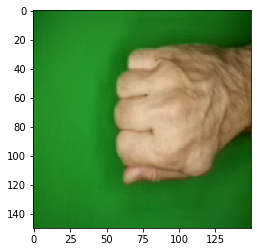

In [26]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

fn = 'rock.png' # nama file yang akan diuji (menggunakan salah satu foto)
path = fn
img = image.load_img(path, target_size=(150,150)) # load nama image
imgplot = plt.imshow(img) # memasukan ke plot / diagram
x = image.img_to_array(img) # mengconvert gambar menjadi array
x = np.expand_dims(x, axis=0) 
 
images = np.vstack([x])
classes = model.predict(images, batch_size=4) #mendapatkan clasess dari gambar yang diuji

print(classes)

# mengubah array menjadi string dengan numpy
classes = np.array_str(classes)
print(fn)
# pembagian hasil dari clasess
if classes == "[[0. 0. 1.]]":
  print('Ini Gunting gaes')
elif classes == "[[1. 0. 0.]]":
  print('ini kertas gaes')
elif classes == "[[0. 1. 0.]]":
  print('ini Batu gaes')
else:
  print('Ga ada gaes erorr lah')
